<a href="https://colab.research.google.com/github/AhmedCoolProjects/ML/blob/main/SupportVectorMachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machines: supervised algorithm for classification by finding a **separator**.
1. Mapping data to **high-dimensional** feature space.
2. finding **separator** which is a hyperplan, not necessary linear.
> tranforming data: and its dimensional representation. for example instead of x, [x,x^2] => Kernelling(Linear,Polynomial,RBF,Sigmoid).

> finging the right hyperplane. hyperplane with the max margin between the different classes. getting the coefs of the separator.

* accurate in high-dimensional spaces.
* memory efficient.

but : the algorithm prone to over-fitting, no probability estimation, not very good for more than 1k rows.

* image recognition.
* text category assignment.
* detecting spam.
* sentiment analysis.
* Gene expression classification.
* Regression, outlier detection and clustering.




# Suport Vector Machines (SVMs)
## Benign or Malignant Cell.

In [49]:
# downloading the data.
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cell_samples.csv

--2021-07-10 14:09:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19.51K  --.-KB/s    in 0.02s   

2021-07-10 14:09:55 (1.19 MB/s) - ‘cell_samples.csv’ saved [19975/19975]



In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [51]:
df = pd.read_csv('/content/cell_samples.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [52]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


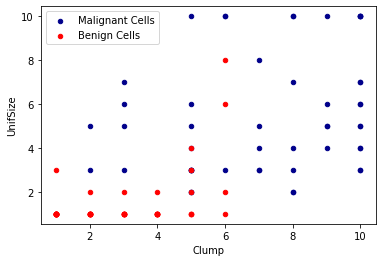

In [53]:
# benign = 2, malignant = 4.
ax = df[df['Class'] == 4][:50].plot(kind="scatter",x="Clump",y="UnifSize",color="DarkBlue",label="Malignant Cells")
df[df['Class'] == 2][:50].plot(kind='scatter',x="Clump",y="UnifSize",color="Red",label="Benign Cells",ax=ax)
plt.show()

In [54]:
# preprocessing and selection
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [55]:
# droping no numerical values in BareNuc
df = df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           683 non-null    int64 
 1   Clump        683 non-null    int64 
 2   UnifSize     683 non-null    int64 
 3   UnifShape    683 non-null    int64 
 4   MargAdh      683 non-null    int64 
 5   SingEpiSize  683 non-null    int64 
 6   BareNuc      683 non-null    object
 7   BlandChrom   683 non-null    int64 
 8   NormNucl     683 non-null    int64 
 9   Mit          683 non-null    int64 
 10  Class        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [57]:
# from object type to int64 type
df['BareNuc'] = df['BareNuc'].astype('int64')

In [58]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [59]:
# getting our features
X = df.drop(['ID','Class'],axis=1).values
X[:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [60]:
# our target
Y = df['Class'].values
Y[:5]

array([2, 2, 2, 2, 2])

In [61]:
print(X.shape,Y.shape)

(683, 9) (683,)


In [62]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=4)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(546, 9) (137, 9)
(546,) (137,)


In [63]:
# kernel functions => linear,Polynomial,Radial basis function (RBF), Sigmoid...
from sklearn import svm
svm_ = svm.SVC(kernel="rbf")
svm_.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
# prediction
y_pre = svm_.predict(x_test)
y_pre[:5]

array([2, 4, 2, 4, 2])

In [65]:
Y[:5]

array([2, 2, 2, 2, 2])

In [66]:
# evaluation 
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [67]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print('Normalized')
  else:
    print('Not Normalized')
  print(cm)

  plt.imshow(cm,
             interpolation='nearest',
             cmap=cmap)
  plt.title(title)
  plt.colorbar()

  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]),
                               range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [68]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pre,labels=[2,4])
np.set_printoptions(precision=2)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



Not Normalized
[[85  5]
 [ 0 47]]


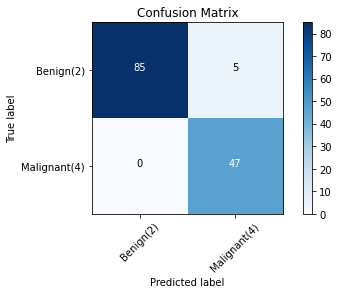

In [69]:
# plot the confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=['Benign(2)','Malignant(4)'])

In [70]:
# f1_score
from sklearn.metrics import f1_score
f1_score(y_test,y_pre,average='weighted')

0.9639038982104676

In [71]:
# jaccard
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,y_pre)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9635036496350365

In [72]:
# lets try the linear kernel
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Not Normalized
[[85  5]
 [ 0 47]]


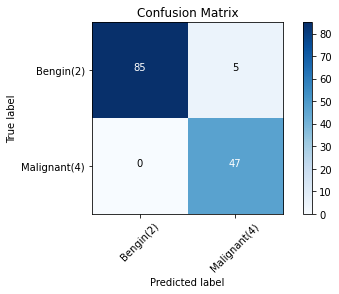

In [73]:
y_pre_linear = svm_linear.predict(x_test)
# evaluation
cnf_matrix_linear = confusion_matrix(y_test,y_pre_linear,labels=[2,4])
plt.figure()
plot_confusion_matrix(cnf_matrix_linear,
                      classes=['Bengin(2)','Malignant(4)'])

In [74]:
print('avg f1-score: %.4f' % f1_score(y_test,y_pre_linear,average='weighted'))
print('Jaccard score: %.4f' % jaccard_similarity_score(y_test,y_pre_linear))

avg f1-score: 0.9639
Jaccard score: 0.9635


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
